<a href="https://colab.research.google.com/github/reddynihal/Ensemble-Approach-to-Causality-Detection-in-Financial-Text/blob/main/Ensemble_Approach_to_Causality_Detection_in_Financial_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import re
import nltk
import string
import spacy

from sklearn.metrics import accuracy_score,classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
###--DATA PREPARATION--###
class Utils(object):

    def cleanText(self,text):
        review = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", str(text))
        review = re.sub(r"\([\s\S]*\)", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", str(review))
        review = review.lower()
        review = re.sub(r"that's", "that is", str(review))
        review = re.sub(r"there's", "there is", str(review))
        review = re.sub(r"what's", "what is", str(review))
        review = re.sub(r"where's", "where is", str(review))
        review = re.sub(r"it's", "it is", str(review))
        review = re.sub(r"who's", "who is", str(review))
        review = re.sub(r"i'm", "i am", str(review))
        review = re.sub(r"she's", "she is", str(review))
        review = re.sub(r"he's", "he is", str(review))
        review = re.sub(r"they're", "they are", str(review))
        review = re.sub(r"who're", "who are", str(review))
        review = re.sub(r"ain't", "am not", str(review))
        review = re.sub(r"wouldn't", "would not", str(review))
        review = re.sub(r"shouldn't", "should not", str(review))
        review = re.sub(r"can't", "can not", str(review))
        review = re.sub(r"couldn't", "could not", str(review))
        review = re.sub(r"won't", "will not", str(review))
        review = re.sub(r" pm ", " ", str(review))
        review = re.sub(r" am ", " ", str(review))
        review = re.sub(r'[^\[\]]+(?=\])', " ", str(review))
        review = re.sub(r"\W", " ", str(review))
        review = re.sub(r"\d", " ", str(review))
        review = re.sub(r"\s+[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+[a-z]$", " ", str(review))
        review = re.sub(r"^[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+", " ", str(review))
        return review

    def remove_punc(self,text):
        table = str.maketrans("", "", string.punctuation)
        return text.translate(table)

    nltk.download('stopwords')
    def remove_stops(self,text):
        stop_words = set(nltk.corpus.stopwords.words('english'))
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)

    def lemmatization(self, text):
        doc = nlp(text)
        return " ".join([token.lemma_ for token in doc])

    def readData(self,path,inputColumnIndex=1,outputColumnIndex=2):
        df = pd.read_csv(path, error_bad_lines=False, sep=';')
        X = df.iloc[:, inputColumnIndex].values
        y = df.iloc[:, outputColumnIndex].values
        return X,y

    def draw_prediction_results(self,y_pred, y_test, my_tags, method):
        print('accuracy of ' + method + ': %s' % accuracy_score(y_pred, y_test))
        print(classification_report(y_test, y_pred, target_names=my_tags, digits = 6))


    def crossValidation(self,prediction,input,output,k=5):
        scores = cross_val_score(prediction, input,output, cv=k)
        print("Accuracy of Cross Validation Mean: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
###--FUNCTION CALLS FOR DATA PREPARATION--###
utils = Utils()
X,y=utils.readData('/content/gdrive/MyDrive/task.csv')

ourTags =['0','1']
corpus=[]

for i in range(0, len(X)):
    t = utils.cleanText(X[i])
    t = utils.remove_punc(t)
    t = utils.remove_stops(t)
    t = utils.lemmatization(t)
    corpus.append(t)
#print(t)





In [ ]:
print(len(corpus))

22058


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=0)

(array([0, 1]), array([16398,  1248]))
17646


<BarContainer object of 2 artists>

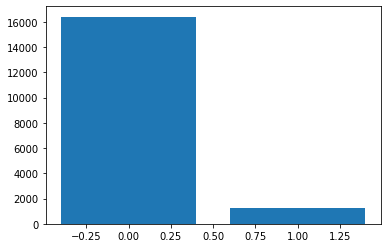

In [ ]:
# BAR PLOT VISUALIZATION
import numpy as np
import matplotlib.pyplot as plt

data_spread = np.unique(y_train, return_counts=True)
print(np.unique(y_train, return_counts=True))
print(len(X_train))

x_labels = data_spread[0]
y_labels = data_spread[1]
plt.bar(x_labels, y_labels)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(min_df=3, max_df=0.2,analyzer='word', ngram_range=(1, 3))
cv.fit(X_train)
X_train=cv.transform(X_train)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X_train)
X_train = tfidf_transformer.transform(X_train)
X_train = X_train.toarray()


In [ ]:
X_test = cv.transform(X_test)
X_test = tfidf_transformer.transform(X_test)
X_test = X_test.toarray()

In [ ]:
print(X_train.shape)

(17646, 31297)


In [ ]:
print(y_train.shape)

(17646,)


In [ ]:
print(X_test.shape)

(4412, 31297)


In [ ]:
print(y_test.shape)

(4412,)


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(cv.vocabulary_)

{'stake': 26409, 'make': 16255, 'single': 25767, 'large': 15027, 'investor': 14318, 'carige': 3856, 'billionaire': 2756, 'malacalza': 16380, 'family': 9697, 'power': 20896, 'derail': 7283, 'rescue': 23450, 'effort': 8503, 'block': 2844, 'million': 17359, 'euro': 9127, 'cash': 3897, 'call': 3625, 'december': 6993, 'prompt': 21641, 'european': 9138, 'central': 4038, 'bank': 2155, 'place': 20494, 'special': 26263, 'administration': 441, 'capital': 3737, 'need': 18176, 'since': 25740, 'swell': 27334, 'euros': 9151, 'face': 9586, 'liquidation': 15702, 'resolution': 23557, 'process': 21362, 'fail': 9644, 'plug': 20637, 'gap': 11168, 'fund': 10961, 'provide': 21754, 'healthy': 12325, 'peer': 20016, 'large investor': 15038, 'million euro': 17378, 'cash call': 3900, 'european central': 9139, 'central bank': 4039, 'special administration': 26264, 'need since': 18230, 'million euros': 17379, 'resolution process': 23560, 'plug gap': 20638, 'provide healthy': 21793, 'european central bank': 9140, '

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(X.shape)

(22058,)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
print("Actual number of tfidf features:",   X_train.shape[1])

In [ ]:
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train)

In [ ]:
print(X_train_lsa.shape)

In [ ]:
print(X_train_lsa.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(X_test_lsa.shape)

In [ ]:
print(y_test.shape)

In [ ]:
###--RANDOM FOREST--###
random_forest = Pipeline([
                        ('random_forest',
                         RandomForestClassifier())
                        ])
random_forest.fit(X_train_lsa, y_train)
pred_random_forest = random_forest.predict(X_test_lsa)

# prediction results

utils.draw_prediction_results(pred_random_forest,y_test,ourTags,"Random Forest")

accuracy of Random Forest: 0.9460562103354487
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6129
           1       0.95      0.29      0.44       489

    accuracy                           0.95      6618
   macro avg       0.95      0.64      0.71      6618
weighted avg       0.95      0.95      0.93      6618



In [ ]:
###--EXTRA TREE CLASSIFIER--###
extra_tree = Pipeline([
                        ('extra tree',
                         ExtraTreesClassifier())
                        ])
extra_tree.fit(X_train_lsa, y_train)
pred_extra_tree = extra_tree.predict(X_test_lsa)

# prediction results
utils.draw_prediction_results(pred_extra_tree,y_test,ourTags,"Extra Tree Classifier")

# 5-fold cross validation results
#utils.crossValidation(extra_tree,X,y,k=5)

accuracy of Extra Tree Classifier: 0.9453762466001813
              precision    recall  f1-score   support

           0   0.948598  0.994854  0.971176      4081
           1   0.840909  0.335347  0.479482       331

    accuracy                       0.945376      4412
   macro avg   0.894754  0.665101  0.725329      4412
weighted avg   0.940519  0.945376  0.934287      4412

Accuracy of Cross Validation Mean: 0.944827 (+/- 0.005443)


In [ ]:
###--LOGISTIC REGRESSION--###
lrp = Pipeline([
                ('lr', LogisticRegression())
                ])
lrp.fit(X_train_lsa, y_train)

y_pred = lrp.predict(X_test_lsa)

# prediction results

utils.draw_prediction_results(y_pred,y_test,ourTags,"logistic regression")

# 5-fold cross validation results
#utils.crossValidation(lrp,X,y,k=5)

accuracy of logistic regression: 0.9399365367180417
              precision    recall  f1-score   support

           0   0.942281  0.996079  0.968434      4081
           1   0.836735  0.247734  0.382284       331

    accuracy                       0.939937      4412
   macro avg   0.889508  0.621907  0.675359      4412
weighted avg   0.934363  0.939937  0.924459      4412

Accuracy of Cross Validation Mean: 0.942198 (+/- 0.003762)


In [ ]:
###--LINEAR SVM--###
linear_svm = Pipeline([
                        ('linear_svc',
                        SVC(kernel='linear'))
                        ])
linear_svm.fit(X_train_lsa, y_train)
y_pred_svc = linear_svm.predict(X_test_lsa)

# prediction results
utils.draw_prediction_results(y_pred_svc,y_test,ourTags,"Linear SVM")

# 5-fold cross validation results
#utils.crossValidation(linear_svm,X,y,k=5)

accuracy of Linear SVM: 0.9442429737080689
              precision    recall  f1-score   support

           0   0.946866  0.995589  0.970616      4081
           1   0.851240  0.311178  0.455752       331

    accuracy                       0.944243      4412
   macro avg   0.899053  0.653384  0.713184      4412
weighted avg   0.939691  0.944243  0.931990      4412

Accuracy of Cross Validation Mean: 0.943694 (+/- 0.004462)


In [ ]:
###--MULTINOMIAL NAIVE BAYES--###
naive_bayes = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),
                                                 )),
                        ('tfidf', TfidfTransformer()),
                        ('naive_bayes',
                         MultinomialNB())
                        ])
naive_bayes.fit(X_train_lsa, y_train)
pred_naive_bayes = naive_bayes.predict(X_test_lsa)

# prediction results

utils.draw_prediction_results(pred_naive_bayes,y_test,ourTags,"Naive Bayes")

# 5-fold cross validation results
#utils.crossValidation(naive_bayes,X,y,k=5)

accuracy of Naive Bayes: 0.9419764279238441
              precision    recall  f1-score   support

           0   0.943016  0.997550  0.969517      4081
           1   0.894737  0.256798  0.399061       331

    accuracy                       0.941976      4412
   macro avg   0.918876  0.627174  0.684289      4412
weighted avg   0.939394  0.941976  0.926719      4412

Accuracy of Cross Validation Mean: 0.942923 (+/- 0.002934)


In [ ]:
###--VOTING CLASSIFIER--###
#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Multinomial Naive Bayes", naive_bayes), ("Extra Tree", extra_tree)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train_lsa, y_train)
pred_hard_ensemble = hard_ensemble.predict(X_test_lsa)

# prediction results
utils.draw_prediction_results(pred_hard_ensemble,y_test,ourTags,"Hard Ensemble")

# 5-fold cross validation results
#utils.crossValidation(hard_ensemble,X,y,k=5)

accuracy of Hard Ensemble: 0.9435630099728014
              precision    recall  f1-score   support

           0   0.943313  0.999020  0.970368      4081
           1   0.955556  0.259819  0.408551       331

    accuracy                       0.943563      4412
   macro avg   0.949434  0.629419  0.689459      4412
weighted avg   0.944232  0.943563  0.928219      4412

Accuracy of Cross Validation Mean: 0.943921 (+/- 0.003166)


In [ ]:
###--ADABOOST--###
seed = 10
num_trees = 30

ada_boost = Pipeline([
                        ('ada_boost',
                         AdaBoostClassifier(n_estimators=num_trees, random_state=seed))
                        ])
ada_boost.fit(X_train_lsa, y_train)
pred_ada_boost = ada_boost.predict(X_test_lsa)

# prediction results
utils.draw_prediction_results(pred_ada_boost,y_test,ourTags,"Ada Boost")

# 5-fold cross validation results
#utils.crossValidation(ada_boost,X,y,k=5)

accuracy of Ada Boost: 0.9376699909338169
              precision    recall  f1-score   support

           0   0.946714  0.988238  0.967030      4081
           1   0.684211  0.314199  0.430642       331

    accuracy                       0.937670      4412
   macro avg   0.815462  0.651219  0.698836      4412
weighted avg   0.927020  0.937670  0.926789      4412

Accuracy of Cross Validation Mean: 0.935533 (+/- 0.008805)


In [ ]:
###--STACKING CLASSIFIER--###
base_learners = [     ('1', ExtraTreesClassifier()),
                      ('2', LogisticRegression()),
                      ('3', MultinomialNB())
              ]
stacking  = Pipeline([
                        ('stacking',
                         StackingClassifier(estimators=base_learners, final_estimator=SVC(kernel='linear')))
                     ])

stacking.fit(X_train_lsa, y_train)
pred_stacking = stacking.predict(X_test_lsa)

# prediction results
utils.draw_prediction_results(pred_stacking,y_test,ourTags,"Stacking")

# 5-fold cross validation results
#utils.crossValidation(stacking,X,y,k=5)

accuracy of Stacking: 0.9442429737080689
              precision    recall  f1-score   support

           0   0.944586  0.998285  0.970693      4081
           1   0.929293  0.277946  0.427907       331

    accuracy                       0.944243      4412
   macro avg   0.936940  0.638115  0.699300      4412
weighted avg   0.943439  0.944243  0.929972      4412

Accuracy of Cross Validation Mean: 0.944147 (+/- 0.003968)


In [ ]:
## COLLECTIVE DATAFRAME FOR VARIOUS MODEL PREDICTIONS
df_test = pd.DataFrame()
df_test['y_actual'] = np.where(y_test == y_test, 1, 0)
df_test['svm'] = df_svm['Classification']
df_test['rf'] = df_rf['Classification']
df_test['nb'] = df_nb['Classification']
df_test['et'] = df_et['Classification']
df_test['lr'] = df_lr['Classification']
df_test['voting'] = df_voting['Classification']

df_test.head()

In [ ]:
##PERFORMING COCHRAN's Q TEST FOR JUDGING THE DIFFERENCE BETWEEN VARIOUS ML MODELS
q, p_value = cochrans_q(np.array(df_test['y_actual']),
                       np.array(df_test['svm']),
                        np.array(df_test['rf']),
                        np.array(df_test['et']),
                        np.array(df_test['lr']),
                        np.array(df_test['voting']))

print('Q: %.3f' % q)
print('p-value: %.3f' % p_value)
# THERE EXIST SIGNIFICANT DIFFERENCE BETWEEN THESE MODELS PREDICTIONS

In [ ]:
###POST-HOC ANALYSIS TO IDENTIFY THE DIFFERENCE BETWEEN WHICH MACHINE LEARNING MODEL
from itertools import combinations
df_wo_actual = df_test[['svm','rf','nb','et','lr','voting']]
cc = list(combinations(df_wo_actual.columns,2))

for i in cc:
  chi2, p_value = cochrans_q(np.array(df_test['y_actual']),
                          np.array(df_test[i[0]]),
                          np.array(df_test[i[1]]))
  if p_value<0.05:
    print('compare {}=>{}'.format(i[0],i[1]))
    print('Cochran\'s Q Chi^2: %.3f' % chi2)
    print('Cochran\'s Q p-value: %.3f' % p_value)